### Do your imports!

In [8]:
import pandas as pd
pd.set_option("display.max_columns", None)

# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [98]:
df = pd.read_csv("subset.csv",
                  nrows=7000000)
df.head()

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

In [9]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

In [99]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [21]:
df.dtypes

unique_key                 int64
created_date              object
closed_date               object
agency                    object
agency_name               object
complaint_type            object
descriptor                object
location_type             object
incident_zip              object
incident_address          object
address_type              object
city                      object
status                    object
borough                   object
open_data_channel_type    object
dtype: object

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

In [ ]:
#Option1
date = pd.read_csv("subset.csv",
                  nrows=2000000,
                parse_dates=['Created Date','Closed Date'])
date.dtypes()

In [100]:
#Option2
df['created_date1']= pd.to_datetime(df.created_date, format='%m/%d/%Y %I:%M:%S %p')
df['closed_date1']= pd.to_datetime(df.closed_date, format='%m/%d/%Y %I:%M:%S %p')
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,created_date1,closed_date1
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,2019-01-27 19:26:21,2019-02-13 10:53:25
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-01-29 11:06:56,2019-02-13 02:07:22
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,2019-02-13 12:28:18,2019-03-15 09:54:50
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE,2019-02-13 15:40:19,2019-02-20 06:18:35
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-02-13 13:18:31,2019-02-20 05:36:54


## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [101]:
#As the answer we're looking for is just the month, I will use .dt
df['create_month'] = df.created_date1.dt.strftime('%B')
df.create_month.value_counts()

January      694772
June         685662
March        684636
May          658650
April        616563
February     610888
November     577166
July         545242
August       543544
December     508286
October      485299
September    389292
Name: create_month, dtype: int64

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [48]:
#As the answer we're looking for is considering both month and year, I will use .resample
df.resample('M', on='created_date1').size().sort_values(ascending=False)
#May 2019 got the most 311 calls

created_date1
2019-05-31    213287
2019-03-31    198597
2019-04-30    190340
2019-06-30    131567
2010-01-31    110336
               ...  
2020-09-30        52
2020-12-31        42
2020-10-31        10
2020-11-30        10
2021-01-31         1
Length: 133, dtype: int64

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

<AxesSubplot:xlabel='created_date1'>

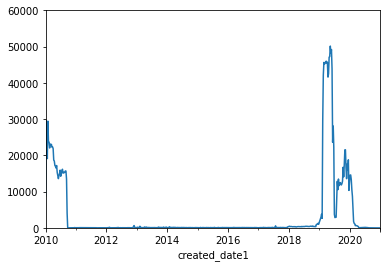

In [54]:
# As the answer involves year, month and week, we should use .resample
df.resample('W', on='created_date1').size().plot(ylim=(0,60000))

## What time of day (by hour) is the least common for 311 complains? The most common?


In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [102]:
# As the answer only considers the hour, we should use .dt
df['create_hour'] = df.created_date1.dt.strftime('%H')
df.create_hour.value_counts()
#The least common is 4 am and the most common is midnight

00    2739569
10     343926
12     333280
11     332724
14     321768
09     313455
13     295925
15     280902
16     238927
08     222637
17     187843
19     175313
18     172635
21     167557
22     165670
20     155923
23     140989
07     132333
01      72143
06      63616
02      49788
03      32939
05      32244
04      27894
Name: create_hour, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

<AxesSubplot:title={'center':'More 311 complains are filed in midnight'}>

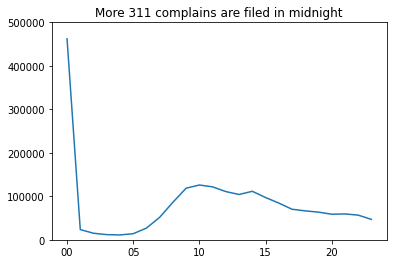

In [59]:
df.create_hour.value_counts().sort_index().plot(ylim=(0,500000),title='More 311 complains are filed in midnight')

# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [26]:
df.agency.value_counts().head(5)

HPD     814775
DOT     287020
DSNY    269979
NYPD    261794
DOB     209122
Name: agency, dtype: int64

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

In [67]:
#NYPD: New York City Police Department
df[df.agency == 'NYPD'].agency_name
#HPD: Department of Housing Preservation and Development
df[df.agency == 'HPD'].agency_name
#DOT: Department of Transportation
df[df.agency == 'DOT'].agency_name
#DSNY: Department of Sanitation
df[df.agency == 'DSNY'].agency_name
#DEP: Department of Environmental Protection
df[df.agency == 'DEP'].agency_name

9          Department of Environmental Protection
14         Department of Environmental Protection
16         Department of Environmental Protection
17         Department of Environmental Protection
18         Department of Environmental Protection
                            ...                  
1997338    Department of Environmental Protection
1998940    Department of Environmental Protection
1999116    Department of Environmental Protection
1999304    Department of Environmental Protection
1999685    Department of Environmental Protection
Name: agency_name, Length: 119455, dtype: object

## What is the most common complaint to HPD?

In [2]:
# Why did you pick these columns to calculate the answer?

In [30]:
df[df.agency == 'HPD'].complaint_type.value_counts(ascending=False)

HEAT/HOT WATER          181490
PLUMBING                108389
HEATING                 104477
GENERAL CONSTRUCTION     87698
PAINT - PLASTER          65400
UNSANITARY CONDITION     50920
NONCONST                 47125
ELECTRIC                 41376
PAINT/PLASTER            28923
WATER LEAK               21289
DOOR/WINDOW              21177
APPLIANCE                19438
GENERAL                  16289
FLOORING/STAIRS          12174
SAFETY                    6257
ELEVATOR                   962
CONSTRUCTION               850
OUTSIDE BUILDING           541
Name: complaint_type, dtype: int64

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.

In [32]:
df.groupby(by='agency')['complaint_type'] \
    .value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(3)

agency  complaint_type                     
ACS     Forms                                     117
COIB    Forms                                       4
DCA     Consumer Complaint                       4240
DCAS    Question                                  261
        Comments                                   19
DCP     Research Questions                          9
DEP     Noise                                   41563
        Water System                            37463
        Sewer                                   21251
DFTA    Housing - Low Income Senior              1589
        Housing Options                           507
        Senior Center Complaint                    64
DHS     Homeless Person Assistance                483
DOB     General Construction/Plumbing           80000
        Elevator                                34933
        Building/Use                            34693
DOE     School Maintenance                        358
        Teaching/Learning/Instruction 

## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [ ]:
# Why did you pick these columns to calculate the answer?

In [61]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,created_date1,closed_date1,create_month,create_hour
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,2019-01-27 19:26:21,2019-02-13 10:53:25,January,19
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-01-29 11:06:56,2019-02-13 02:07:22,January,11
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,2019-02-13 12:28:18,2019-03-15 09:54:50,February,12
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE,2019-02-13 15:40:19,2019-02-20 06:18:35,February,15
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-02-13 13:18:31,2019-02-20 05:36:54,February,13


In [68]:
df[df.complaint_type == 'Noise - Residential'].descriptor.value_counts()

Loud Music/Party    47675
Banging/Pounding    21348
Loud Talking         5304
Loud Television      1524
Name: descriptor, dtype: int64

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

<AxesSubplot:>

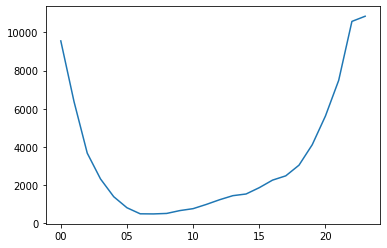

In [71]:
df[df.descriptor == 'Loud Music/Party'].create_hour.value_counts().sort_index().plot()

## When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

<AxesSubplot:xlabel='created_date1'>

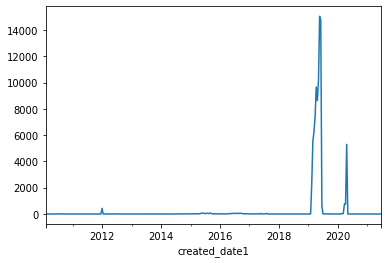

In [89]:
# It considers both year and month, so we should use .resample
df[df.descriptor == 'Loud Music/Party'].resample('2W', on='created_date1').size().plot()

## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

In [92]:
df[df.complaint_type.str.contains('bee', case=False)]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,created_date1,closed_date1,create_month
288065,42054326,03/26/2019 07:10:34 PM,04/05/2019 03:00:55 PM,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11103.0,24-19 42 STREET,ADDRESS,ASTORIA,Closed,QUEENS,PHONE,2019-03-26 19:10:34,2019-04-05 15:00:55,March
291446,42058804,03/26/2019 06:14:03 PM,04/05/2019 03:02:00 PM,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11104.0,42-19 42 STREET,ADDRESS,SUNNYSIDE,Closed,QUEENS,PHONE,2019-03-26 18:14:03,2019-04-05 15:02:00,March
372834,42163934,04/08/2019 06:26:04 PM,04/29/2019 11:18:17 AM,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10302,57 HOOKER PLACE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,2019-04-08 18:26:04,2019-04-29 11:18:17,April
378505,42171504,04/08/2019 03:50:40 PM,04/29/2019 11:11:42 AM,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Mixed Use Building,11214,2060 78 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,2019-04-08 15:50:40,2019-04-29 11:11:42,April
391645,42189666,04/10/2019 07:28:14 PM,04/29/2019 11:17:09 AM,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10469,1462 STICKNEY PLACE,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-04-10 19:28:14,2019-04-29 11:17:09,April
466469,42291921,04/23/2019 11:39:59 AM,05/06/2019 09:36:28 AM,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11210,674 EAST 22 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,2019-04-23 11:39:59,2019-05-06 09:36:28,April
472431,42300656,04/23/2019 02:56:21 PM,05/06/2019 09:37:30 AM,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,3+ Family Apartment Building,10037,2311 5 AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,2019-04-23 14:56:21,2019-05-06 09:37:30,April
506112,42497797,04/28/2019 03:33:33 PM,05/13/2019 11:10:45 AM,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11385,2017 HARMAN STREET,ADDRESS,RIDGEWOOD,Closed,QUEENS,ONLINE,2019-04-28 15:33:33,2019-05-13 11:10:45,April
532844,42533095,05/02/2019 01:13:47 PM,05/13/2019 11:10:47 AM,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11419,107-14 125 STREET,ADDRESS,SOUTH RICHMOND HILL,Closed,QUEENS,ONLINE,2019-05-02 13:13:47,2019-05-13 11:10:47,May
547427,42549720,05/02/2019 12:45:50 PM,05/13/2019 11:10:46 AM,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10309,62 SHARROTTS ROAD,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,2019-05-02 12:45:50,2019-05-13 11:10:46,May


### What month do most of the complaints happen in? I'd like to see a graph.

<AxesSubplot:>

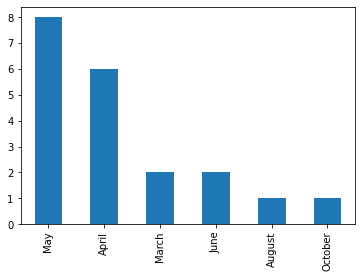

In [96]:
bees = df[df.complaint_type.str.contains('bee', case=False)]
bees.create_month.value_counts().plot(kind='bar')

### Are the people getting in trouble usually beekeepers or not beekeepers?

In [97]:
bees.descriptor.value_counts()
#the people getting in trouble usually not beekeepers

Bees/Wasps - Not a beekeper    12
Beekeeping - Honeybees          8
Name: descriptor, dtype: int64

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

In [139]:
df['closed_date1'] - df['created_date1']

0         16 days 15:27:04
1         14 days 15:00:26
2         29 days 21:26:32
3          6 days 14:38:16
4          6 days 16:18:23
                ...       
6999995    0 days 00:20:26
6999996    0 days 00:28:43
6999997    0 days 00:24:31
6999998    0 days 00:39:26
6999999    0 days 00:47:30
Length: 7000000, dtype: timedelta64[ns]

Save it as a new column called `time_to_fix`

In [141]:
df['time_to_fix'] = df['closed_date1'] - df['created_date1']
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,created_date1,closed_date1,create_month,create_hour,time_to_fix
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,2019-01-27 19:26:21,2019-02-13 10:53:25,January,19,16 days 15:27:04
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-01-29 11:06:56,2019-02-13 02:07:22,January,11,14 days 15:00:26
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,2019-02-13 12:28:18,2019-03-15 09:54:50,February,12,29 days 21:26:32
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE,2019-02-13 15:40:19,2019-02-20 06:18:35,February,15,6 days 14:38:16
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-02-13 13:18:31,2019-02-20 05:36:54,February,13,6 days 16:18:23


## Which agency has the best time-to-fix time?

In [148]:
df.groupby(by='agency').time_to_fix.median().sort_values().head(10)

agency
EDC            0 days 00:00:05
3-1-1          0 days 00:00:37
HRA            0 days 00:00:38
NYPD           0 days 00:57:03
DOHMH   0 days 02:41:16.500000
DHS            0 days 04:39:23
DOT            0 days 16:18:50
DEP            0 days 22:34:00
DORIS          1 days 00:03:53
DSNY           1 days 22:17:00
Name: time_to_fix, dtype: timedelta64[ns]

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

In [156]:
df.groupby(by='agency').time_to_fix.describe() 

,count,mean,std,min,25%,50%,75%,max
agency,,,,,,,,
3-1-1,39,0 days 00:01:07.589743589,0 days 00:01:36.643870921,0 days 00:00:03,0 days 00:00:26,0 days 00:00:37,0 days 00:00:58,0 days 00:07:44
ACS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
COIB,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCA,25036,34 days 05:18:54.670115034,99 days 19:53:37.146073115,0 days 00:04:02,0 days 22:25:00.750000,1 days 22:52:50.500000,6 days 22:13:20.250000,804 days 21:18:42
DCAS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCP,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DEP,310380,9 days 11:05:50.446936014,64 days 02:55:44.238188981,-1062 days +08:42:00,0 days 02:51:00,0 days 23:05:00,4 days 08:24:00,4004 days 05:55:00
DFTA,4315,9 days 17:32:46.468597914,24 days 15:43:18.603337600,0 days 00:04:30,3 days 00:51:04.500000,9 days 23:40:41,13 days 21:30:39.500000,1506 days 10:19:19
DHS,38584,4 days 14:44:27.101674269,15 days 06:13:51.652897115,0 days 00:00:04,0 days 00:55:25.750000,0 days 04:47:07,5 days 02:15:48.500000,586 days 12:35:49


### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

In [157]:
df.groupby('agency').time_to_fix.agg(['median','size'])

,median,size
agency,,
3-1-1,0 days 00:00:37,41
ACS,NaT,127
COIB,NaT,4
DCA,1 days 22:39:30.500000,25132
DCAS,NaT,281
DCP,NaT,9
DEP,0 days 22:34:00,314050
DFTA,9 days 23:39:37,4316
DHS,0 days 04:39:23,38766


In [158]:
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})

time_to_fix         
                                                         median     size
agency                                                                  
3-1-1                                           0 days 00:00:37       41
ACS                                                         NaT      127
COIB                                                        NaT        4
DCA                                      1 days 22:39:30.500000    25132
DCAS                                                        NaT      281
DCP                                                         NaT        9
DEP                                             0 days 22:34:00   314050
DFTA                                            9 days 23:39:37     4316
DHS                                             0 days 04:39:23    38766
DOB                                      9 days 10:53:10.500000   517204
DOE                                      5 days 01:19:55.500000      926
DOF                                             2 days 18:01:52   138575
DOHMH                                    0 days 02:41:16.500000    45870
DOITT                                   16 days 20:31:25.500000      330
DORIS                                           1 days 00:03:53       53
DOT                                             0 days 16:18:50   883962
DPR                                             3 days 23:10:52   134283
DSNY                                            1 days 22:17:00   736619
DVS                                                         NaT      120
EDC                                             0 days 00:00:05     4462
FDNY                                                        NaT        5
HPD                                             6 days 00:00:00  3212165
HRA                                             0 days 00:00:38    66659
MAYORâS OFFICE OF SPECIAL ENFORCEMENT         2 days 03:23:04    13111
NYCEM                                          10 days 05:28:23     1425
NYPD                                            0 days 00:57:03   843960
TAX                                                         NaT       87
TLC                                            13 days 17:58:11    17458

## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

In [162]:
df[df.agency == 'NYPD'].groupby(by='complaint_type').time_to_fix.median().sort_values()

complaint_type
Illegal Fireworks                    0 days 00:16:44
Non-Emergency Police Matter          0 days 00:21:24
Homeless Street Condition            0 days 00:21:42
Graffiti                      0 days 00:33:04.500000
Noise - Street/Sidewalk              0 days 00:35:25
Noise - Vehicle                      0 days 00:38:59
Squeegee                             0 days 00:43:32
Drinking                             0 days 00:45:37
Urinating in Public                  0 days 00:47:09
Drug Activity                        0 days 00:50:08
Bike/Roller/Skate Chronic     0 days 00:51:21.500000
Noise - Park                  0 days 00:53:09.500000
Encampment                           0 days 00:55:03
Animal-Abuse                  0 days 01:00:30.500000
Noise - Residential                  0 days 01:03:28
Traffic                              0 days 01:06:16
Noise - Commercial                   0 days 01:12:20
Abandoned Vehicle                    0 days 01:16:48
Disorderly Youth               

## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

In [165]:
pd.set_option("display.max_rows", 200)
df.groupby(['agency','borough']).time_to_fix.median()

agency                                   borough      
3-1-1                                    BROOKLYN                        0 days 00:00:55
                                         MANHATTAN                       0 days 00:00:28
                                         QUEENS                   0 days 00:00:49.500000
                                         Unspecified              0 days 00:00:07.500000
ACS                                      Unspecified                                 NaT
COIB                                     Unspecified                                 NaT
DCA                                      BRONX                           1 days 19:55:56
                                         BROOKLYN                 1 days 19:51:45.500000
                                         MANHATTAN                       1 days 21:54:23
                                         QUEENS                          2 days 00:59:57
                                         STATEN ISLAND 

### Or, use another technique!

We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

In [193]:
df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
    aggfunc='median'
)

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
3-1-1,NaT,0 days 00:00:55,0 days 00:00:28,0 days 00:00:49.500000,NaT,0 days 00:00:07.500000
DCA,1 days 19:55:56,1 days 19:51:45.500000,1 days 21:54:23,2 days 00:59:57,2 days 01:50:14,1 days 23:55:40
DEP,0 days 20:01:00,0 days 17:19:00,1 days 21:11:00,0 days 19:25:00,0 days 18:58:00,29 days 12:35:00
DFTA,11 days 18:17:38,6 days 19:20:58,10 days 02:12:23,10 days 23:59:46,10 days 21:04:10.500000,11 days 18:56:50
DHS,5 days 20:37:41.500000,0 days 22:16:19.500000,0 days 01:28:55.500000,0 days 11:24:05,6 days 19:41:07,0 days 00:07:48
DOB,17 days 12:30:09.500000,6 days 15:42:18.500000,7 days 03:48:54,13 days 09:48:04,8 days 15:18:23.500000,0 days 00:00:00
DOE,5 days 00:19:35,4 days 00:33:05,7 days 21:19:03.500000,4 days 20:59:48,7 days 21:44:30,4 days 18:50:09
DOF,2 days 03:38:53.500000,2 days 02:48:07.500000,2 days 00:43:03.500000,2 days 03:43:21,2 days 16:12:20,4 days 07:15:07.500000
DOHMH,0 days 00:26:08,0 days 11:18:28,0 days 00:00:01,0 days 14:11:54.500000,0 days 18:43:37.500000,NaT


### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

In [198]:
df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
    aggfunc='median'
).sort_values(by = 'BRONX', ascending=False).sort_values(by = 'STATEN ISLAND', ascending=False)

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
TLC,29 days 14:20:10,22 days 23:36:17.500000,5 days 14:57:54,20 days 22:30:08.500000,25 days 15:32:26,13 days 19:31:49
EDC,0 days 00:00:04.500000,18 days 04:35:43.500000,0 days 00:00:03,0 days 00:00:03,16 days 10:45:17,48 days 19:23:19
DOITT,20 days 00:40:09,14 days 20:03:56,17 days 16:16:47,15 days 20:50:23,15 days 09:53:36,31 days 19:26:36
DFTA,11 days 18:17:38,6 days 19:20:58,10 days 02:12:23,10 days 23:59:46,10 days 21:04:10.500000,11 days 18:56:50
DOB,17 days 12:30:09.500000,6 days 15:42:18.500000,7 days 03:48:54,13 days 09:48:04,8 days 15:18:23.500000,0 days 00:00:00
DOE,5 days 00:19:35,4 days 00:33:05,7 days 21:19:03.500000,4 days 20:59:48,7 days 21:44:30,4 days 18:50:09
HPD,5 days 00:00:00,5 days 00:00:00,6 days 00:00:00,7 days 00:00:00,7 days 00:00:00,6 days 00:00:00
DHS,5 days 20:37:41.500000,0 days 22:16:19.500000,0 days 01:28:55.500000,0 days 11:24:05,6 days 19:41:07,0 days 00:07:48
MAYORâS OFFICE OF SPECIAL ENFORCEMENT,1 days 21:48:35,2 days 20:04:07,1 days 12:45:10,2 days 18:31:12,2 days 21:32:41.500000,50 days 22:02:18


## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

In [182]:
df.complaint_type[(df.created_date1 >= '2020-11-26') & (df.created_date1 < '2020-11-27')].value_counts().head(10)

Elevator                                   14
Traffic Signal Condition                   11
Dirty Conditions                            6
Missed Collection (All Materials)           5
General Construction/Plumbing               5
Special Projects Inspection Team (SPIT)     3
Derelict Vehicles                           3
HEAT/HOT WATER                              3
Boilers                                     2
GENERAL                                     2
Name: complaint_type, dtype: int64

In [183]:
df.complaint_type[(df.created_date1 >= '2020-11-25') & (df.created_date1 < '2020-11-26')].value_counts().head(10)

Street Light Condition               76
Traffic Signal Condition             40
Missed Collection (All Materials)    29
Derelict Vehicles                    14
Elevator                             14
General Construction/Plumbing        13
Dirty Conditions                      9
Water System                          7
Noise                                 5
HEAT/HOT WATER                        5
Name: complaint_type, dtype: int64

## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

In [187]:
df.complaint_type[(df['created_date1'].dt.day == 25) & (df['created_date1'].dt.month == 12)] \
    .value_counts().head(10)

HEATING                     3556
HEAT/HOT WATER               673
Street Condition             414
PLUMBING                     392
GENERAL CONSTRUCTION         335
PAINT - PLASTER              265
Traffic Signal Condition     171
NONCONST                     147
ELECTRIC                     141
Dirty Conditions             134
Name: complaint_type, dtype: int64

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

In [136]:
#Since the death of George Perry Floyd happened on May 25, 2020, I am trying to calculate the number of illegal fireworks in June, July and August in 2020.
#And then compare 2020 to previous years.
firework = df[df.complaint_type.str.contains('illegal firework', case=False)]
summer = firework[firework.create_month.isin(['June','July','August'])]
summer['year'] = summer.created_date1.dt.strftime('%Y')
summer['yearmonth'] = summer['year'] + summer['create_month']
summer.yearmonth.value_counts()

/var/folders/9m/w7ffkstj051dnyjnyklwvwmr0000gn/T/ipykernel_6389/1628454865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer['year'] = summer.created_date1.dt.strftime('%Y')
/var/folders/9m/w7ffkstj051dnyjnyklwvwmr0000gn/T/ipykernel_6389/1628454865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer['yearmonth'] = summer['year'] + summer['create_month']


2020June      25916
2020July      15192
2020August      276
2019July        102
2019June         51
2019August       27
2015July          4
2021July          3
2017July          2
2016June          1
2016July          1
2014July          1
2017June          1
Name: yearmonth, dtype: int64

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

/var/folders/9m/w7ffkstj051dnyjnyklwvwmr0000gn/T/ipykernel_6389/3099197387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanitation['yearmonth'] = sanitation.created_date1.dt.strftime('%Y') + sanitation.created_date1.dt.strftime('%m')


<AxesSubplot:xlabel='yearmonth'>

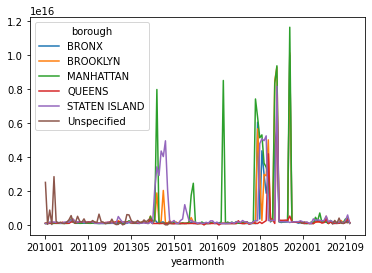

In [173]:
sanitation = df[df.agency == 'DSNY']
sanitation['yearmonth'] = sanitation.created_date1.dt.strftime('%Y') + sanitation.created_date1.dt.strftime('%m')
pivot_table = sanitation.pivot_table(
    columns='borough',
    index='yearmonth',
    values='time_to_fix',
    aggfunc='median'
)
# sanitation.time_to_fix.value_counts()
pivot_table.plot()
# sanitation.descriptor.value_counts().head(20)
# #.resample('M', on='created_date1').size()

In [167]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,created_date1,closed_date1,create_month,create_hour,time_to_fix
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,2019-01-27 19:26:21,2019-02-13 10:53:25,January,19,16 days 15:27:04
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-01-29 11:06:56,2019-02-13 02:07:22,January,11,14 days 15:00:26
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,2019-02-13 12:28:18,2019-03-15 09:54:50,February,12,29 days 21:26:32
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE,2019-02-13 15:40:19,2019-02-20 06:18:35,February,15,6 days 14:38:16
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,2019-02-13 13:18:31,2019-02-20 05:36:54,February,13,6 days 16:18:23


## Gentrification and whining to the government

It's said that when a neighborhood gentrifies, the people who move in are quick to report things to authorities that would previously have been ignored or dealt with on a personal basis. Use the data to investigate the concept (two techniques for finding gentrifying area are using census data and using Google).

What assumptions is your analysis making? What could make your analysis fall apart? Be sure to cite your sources. 

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)